In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import efl_mapping as efl

### Get the raw wikipedia HTML using the `requests` library

The requests library is a python library that: 
> "allows you to send HTTP/1.1 requests extremely easily"
> https://requests.readthedocs.io/en/master/

For our purposes, just understand that we are using `requests.get` function, that allows us to "GET" the HTML from a particular URL or web address. 

We will then use this, to analyse and extract information that we care about, programmatically.

In [2]:
response = requests.get(
        "https://en.wikipedia.org/wiki/EFL_Championship"
    ).text

response[:200] # Just the first 200 characters otherwise it is LONG

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>EFL Championship - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF='

### Parse the HTML into a navigable BeautifulSoup object
Having just seen the above string output, you now realise how on earth am I meant to get the information I want out of it? It is one massive, somewhat unstructured string.

This is where the Python library BeautifulSoup steps in. According to the Wikipedia definition of what BeautifulSoup does, it says this:

> Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.
> https://en.wikipedia.org/wiki/Beautiful_Soup_(HTML_parser)

Okay, like with any definition, you then find yourself wanting to lookup another definition... what is a "parse tree?"

> A parse tree or parsing tree[1] or derivation tree or concrete syntax tree is an ordered, rooted tree that represents the syntactic structure of a string according to some context-free grammar...
> https://en.wikipedia.org/wiki/Parse_tree#:~:text=A%20parse%20tree%20or%20parsing,to%20some%20context%2Dfree%20grammar.https://en.wikipedia.org/wiki/Parse_tree#:~:text=A%20parse%20tree%20or%20parsing,to%20some%20context%2Dfree%20grammar.

After Googling for a HTML parse tree, I found this image.

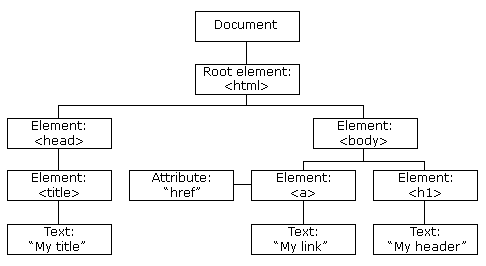

If you're familiar with HTML, this probably all makes sense now. IF not, just know that there is kind of a hierarchical order to HTML. Much like with a family tree, it starts with one family, then 2 children, who then each have 2 children of their own, they are each siblings and so on and so forth. You can form a structured tree of HTML much like a family.

BeautifulSoup understands this structure implicitly, and enables the Python user to much more easily query and search the HTML, to find what one is looking for!!

Haha amazing! Now let's get "scraping".

In [3]:
soup = BeautifulSoup(response, 'lxml')

You can now easily navigate to different tags and divs in the html.

In [4]:
soup.title

<title>EFL Championship - Wikipedia</title>

A slightly more sophisticated example, is that we can "find_all" of a certain tag in the document, for example below I've found all the link elements, and then printed the details of the text of first 5 links.

In [5]:
for link in soup.find_all('a')[:5]:
    print(link.text)


Jump to navigation
Jump to search
English Championship (golf)
Coca-Cola Charity Championship


Coming back to our project then, we know we are looking for a "table" element that represents our EFL team data, and we know it's a specific class of table as defined in the code, as a "wikitable sortable", so we can narrow down to that attribute with the below:

In [6]:
soup.find("table", {"class":"wikitable sortable"})

<table class="wikitable sortable" style="text-align:center;">
<tbody><tr>
<th>Club
</th>
<th>Finishing position <a href="/wiki/2019%E2%80%9320_EFL_Championship" title="2019–20 EFL Championship">last season</a>
</th>
<th>Location
</th>
<th>Stadium
</th>
<th>Capacity<sup class="reference" id="cite_ref-20"><a href="#cite_note-20">[20]</a></sup>
</th></tr>
<tr>
<td style="text-align:left;"><a href="/wiki/Barnsley_F.C." title="Barnsley F.C.">Barnsley</a></td>
<td><span data-sort-value="7001210000000000000♠" style="display:none"></span>21st</td>
<td><a href="/wiki/Barnsley" title="Barnsley">Barnsley</a></td>
<td><a href="/wiki/Oakwell" title="Oakwell">Oakwell</a></td>
<td align="center">23,287
</td></tr>
<tr>
<td style="text-align:left;"><a href="/wiki/Birmingham_City_F.C." title="Birmingham City F.C.">Birmingham City</a></td>
<td><span data-sort-value="7001200000000000000♠" style="display:none"></span>20th</td>
<td><a href="/wiki/Birmingham" title="Birmingham">Birmingham</a></td>
<td><a hre

In [7]:
table_html = soup.find("table", {"class":"wikitable sortable"})

### Read it into a dataframe with `pandas`

In [8]:
df_unfiltered = pd.read_html(str(table_html))[0]

In [9]:
df_unfiltered.head()

,Club,Finishing position last season,Location,Stadium,Capacity[20]
0,Barnsley,NaN,Barnsley,Oakwell,23287
1,Birmingham City,NaN,Birmingham,St Andrew's,29409
2,Blackburn Rovers,NaN,Blackburn,Ewood Park,31367
3,Bournemouth,Premier League (relegated),Bournemouth,Dean Court,11364
4,Brentford,NaN,London (Brentford),Brentford Community Stadium,17250


### Filter it to the columns we care about

In [10]:
df = df_unfiltered[['Club', 'Stadium']]

In [11]:
df.head()

,Club,Stadium
0,Barnsley,Oakwell
1,Birmingham City,St Andrew's
2,Blackburn Rovers,Ewood Park
3,Bournemouth,Dean Court
4,Brentford,Brentford Community Stadium


### Pulling it all under one function

In [12]:
df = efl.get_efl_team_data()

In [13]:
df

,Club,Stadium
0,Barnsley,Oakwell
1,Birmingham City,St Andrew's
2,Blackburn Rovers,Ewood Park
3,Bournemouth,Dean Court
4,Brentford,Brentford Community Stadium
5,Bristol City,Ashton Gate
6,Cardiff City,Cardiff City Stadium
7,Coventry City,St Andrew's
8,Derby County,Pride Park Stadium
9,Huddersfield Town,Kirklees Stadium
